In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
LastDay = dt.date(2017, 8, 23)
# Calculate the date 1 year ago from the last data point in the database
OneYearAgo = LastDay - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
ResultsLastYear = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= OneYearAgo ).all()


In [11]:
#Check work
LastDay.year
OneYearAgo.year


2016

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(ResultsLastYear, columns = ["Date", "PRCP"])


In [13]:
df.set_index(df["Date"], inplace = True)

In [14]:
# Sort the dataframe by date
#df.sort_values("Date")

In [15]:
New_df = df.dropna()
#New_df.sort_values("Date")
#I am getting am error that I cannot resolve to sort the values by date.  
#The graph below does not reflect the data sorted by date. 

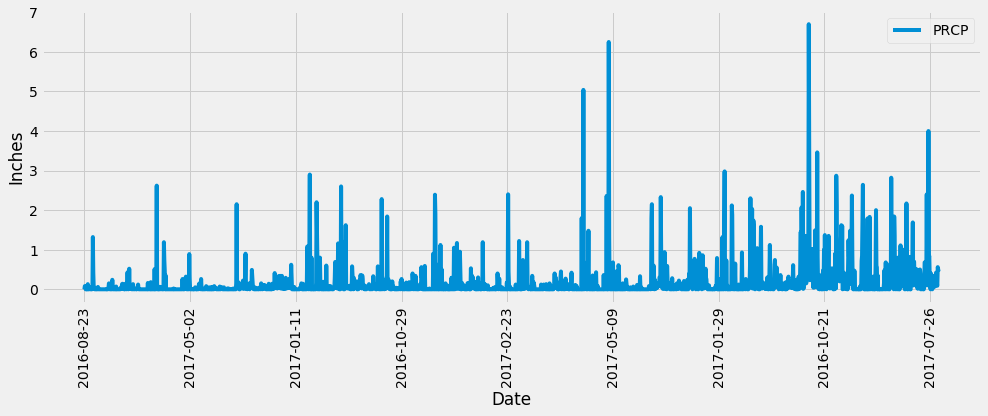

<Figure size 432x288 with 0 Axes>

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
New_df.plot(figsize=(15,5), rot = 90)
plt.ylabel("Inches")
plt.show()
plt.tight_layout()
plt.savefig("Precipitation")

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
New_df["PRCP"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: PRCP, dtype: float64

In [18]:
# Design a query to show how many stations are available in this dataset?
StationsAvail = session.query(Station.id).count()
StationsAvail

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).all()
station_L = []
count_L = []
for station, count in station_counts:
    print(station, count)
    station_L.append(station)
    count_L.append(count)


USC00511918 1979
USC00513117 2709
USC00514830 2202
USC00516128 2612
USC00517948 1372
USC00518838 511
USC00519281 2772
USC00519397 2724
USC00519523 2669


In [20]:
station_L
count_L

[1979, 2709, 2202, 2612, 1372, 511, 2772, 2724, 2669]

In [21]:
station_dict = {
    "Station" : station_L,
    "Count" : count_L
    }
station_dict

{'Station': ['USC00511918',
  'USC00513117',
  'USC00514830',
  'USC00516128',
  'USC00517948',
  'USC00518838',
  'USC00519281',
  'USC00519397',
  'USC00519523'],
 'Count': [1979, 2709, 2202, 2612, 1372, 511, 2772, 2724, 2669]}

In [22]:
Station_Counts_df = pd.DataFrame(station_dict)
Station_Counts_df 
Sorted_Station_Counts_df = Station_Counts_df.sort_values(by = ["Count"], ascending=False) 
Sorted_Station_Counts_df

,Station,Count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Temps = session.query(Measurement.tobs).filter_by(station= "USC00519281").all()
#Temps

In [24]:
lowest_temp = session.query(func.min(Measurement.tobs).label("max_score")).filter_by(station = "USC00519281").all()
lowest_temp

[(54.0)]

In [25]:
highest_temp = session.query(func.max(Measurement.tobs).label("max_score")).filter_by(station = "USC00519281").all() 
highest_temp                  

[(85.0)]

In [26]:
ave_temp = session.query(func.avg(Measurement.tobs).label("max_score")).filter_by(station = "USC00519281").all() 
ave_temp  

[(71.66378066378067)]

In [27]:
# Choose the station with the highest number of temperature observations.
ResultsLastYear = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= OneYearAgo ).filter_by(station ="USC00519281").all()

Temp_df = pd.DataFrame(ResultsLastYear, columns = ["Date", "TOBS"])
Sorted_Temp_df = Temp_df.sort_values("Date")
Sorted_Temp_df


,Date,TOBS
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


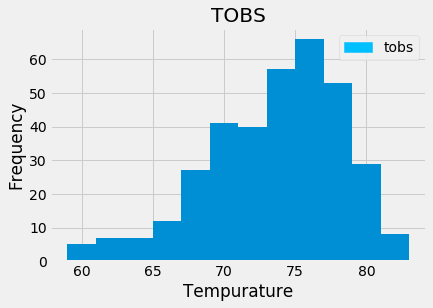

In [28]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hist = Sorted_Temp_df.hist(bins=12)
plt.xlabel("Tempurature")
plt.ylabel("Frequency")
Blue_patch = mpatches.Patch(color='deepskyblue', label='tobs')
plt.legend(handles=[Blue_patch])


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
